# LOL Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
from plotly import tools
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("league-of-legends/games.csv")

# blue team has advantage

In [2]:
# drop anything thats under ~3.5 minutes because game hasnt started
df.drop(df[df['gameDuration']<= 210].index , inplace=True)

In [3]:
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [4]:
data=df[["winner","firstBlood","firstTower","firstInhibitor","firstBaron","firstDragon","firstRiftHerald","t1_towerKills","t1_inhibitorKills",'t1_baronKills',
       't1_dragonKills','t2_towerKills','t2_inhibitorKills', 't2_baronKills', 't2_dragonKills'
       ]]

Text(0.5, 1.0, 'Correlation matrix of continuous varibles')

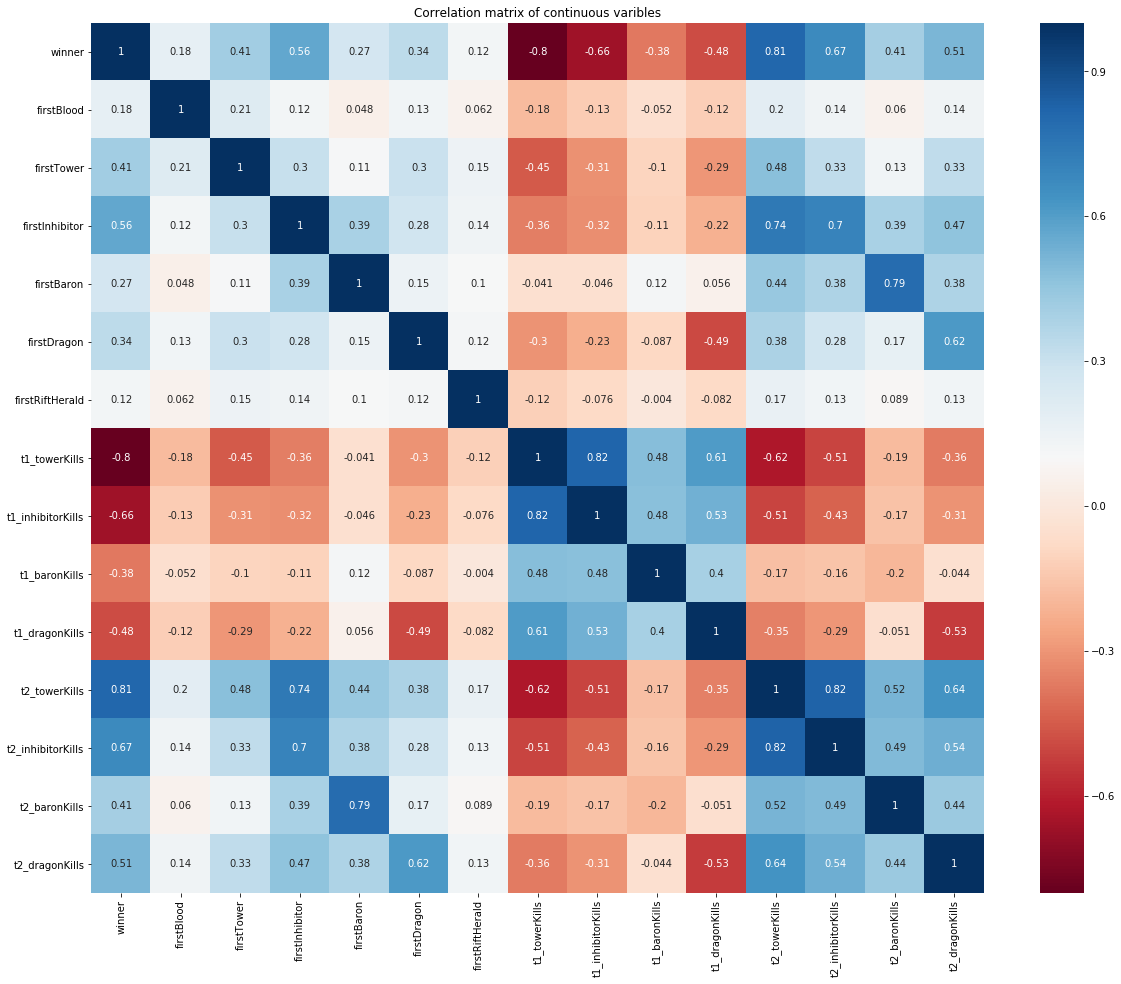

In [5]:
# correlation matrix
corr_matrix = data.corr()
corr_matrix= corr_matrix.round(decimals=3)
plt.figure(figsize=(20,16))
sn.heatmap(corr_matrix,annot=True, cmap="RdBu")
plt.title("Correlation matrix of continuous varibles")

In [6]:
data_new=data[["winner","t1_towerKills","t1_inhibitorKills","t1_baronKills","t1_dragonKills","t2_towerKills","t2_inhibitorKills","t2_baronKills","t2_dragonKills"]]
data_new.groupby("winner").mean()

,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills
winner,,,,,,,,
1,8.783444,1.868224,0.598205,1.993180,2.610826,0.169678,0.176459,0.821111
2,2.787207,0.190011,0.156983,0.826663,8.804725,1.864071,0.676752,2.063725


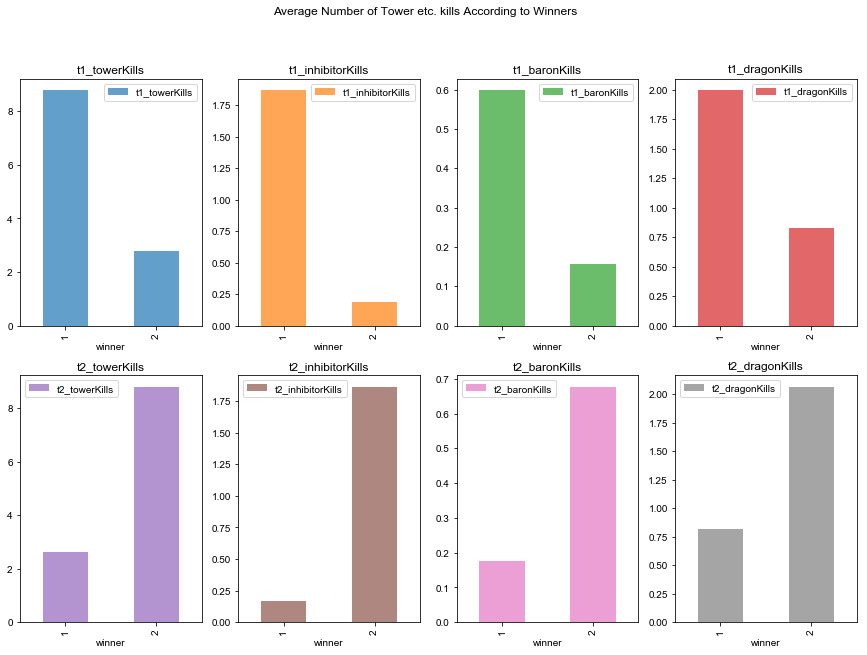

In [7]:


f=data_new.groupby("winner").mean().plot(kind="bar",subplots=True,sharex=False,sharey=False,figsize=(15,10),layout=(2,4),alpha=0.7,title="Average Number of Tower etc. kills According to Winners")
f= sn.set_style("darkgrid")
f=sn.set_context("paper")
plt.show()

# Decision tree classificator 

In [8]:
y = data["winner"].values
x = data.drop(["winner"],axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=50)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [9]:
criterion=["gini","entropy"]
max_depth=range(1,20,2)
splitter=["best","random"]
dt=DecisionTreeClassifier()
grid_decision_tree=GridSearchCV(estimator=dt,cv=15,param_grid=dict(criterion=criterion,max_depth=max_depth,splitter=splitter))

In [10]:
grid_decision_tree.fit(x_train,y_train)
print("best score: ", grid_decision_tree.best_score_)
print("best param: ", grid_decision_tree.best_params_)

best score:  0.9777494331065759
best param:  {'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}


In [11]:
dt2=DecisionTreeClassifier(criterion="entropy",max_depth=7, splitter="best")
dt2.fit(x_train,y_train)
print("score:", dt2.score(x_test,y_test))

score: 0.9763243171747901


In [12]:
from sklearn.metrics import confusion_matrix,classification_report
predicted_values = dt2.predict(x_test)
cm=confusion_matrix(y_test,predicted_values)
cr=classification_report(y_test,predicted_values)
print('Classification report : \n',cr)

Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.97      0.98      7688
           2       0.97      0.98      0.98      7433

   micro avg       0.98      0.98      0.98     15121
   macro avg       0.98      0.98      0.98     15121
weighted avg       0.98      0.98      0.98     15121



In [13]:
from sklearn.metrics import accuracy_score


print(accuracy_score(y_test, predicted_values))

0.9763243171747901


Text(0.5, 14.7, 'y_predicted')

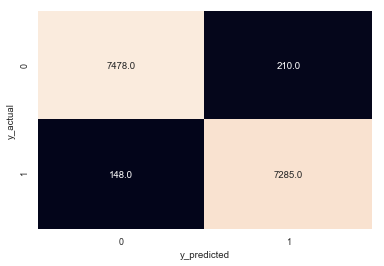

In [14]:
g1 = sn.heatmap(cm,annot=True,fmt=".1f",cbar=False)
g1.set_ylabel('y_actual')
g1.set_xlabel('y_predicted')

In [15]:
scenario={"feature":["first_blood","first_tower","first_inhibitor","first_Baron","first_Dragon","first_RiftHerald",
"t1_tower","t1_inhibitor","t1_baron","t1_dragon","t2_tower","t2_inhibitor","t2_baron","t2_dragon"],
         "value":[1,1,2,1,1,1,10,2,1,4,7,2,1,1]}
scen=pd.DataFrame(scenario)
scen.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
feature,first_blood,first_tower,first_inhibitor,first_Baron,first_Dragon,first_RiftHerald,t1_tower,t1_inhibitor,t1_baron,t1_dragon,t2_tower,t2_inhibitor,t2_baron,t2_dragon
value,1,1,2,1,1,1,10,2,1,4,7,2,1,1


In [16]:
x1=[[1,1,2,1,1,1,10,2,1,4,7,2,1,1]]
c=dt2.predict_proba(x1).reshape(-1,1)
print("winner is :" , dt2.predict(x1) )
print("first team win probability is % ", list(c[0]*100),"\nsecond team win probability is %:",list(c[1]*100))

winner is : [1]
first team win probability is %  [86.95652173913044] 
second team win probability is %: [13.043478260869565]


In [17]:
x2=[[0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
c=dt2.predict_proba(x2).reshape(-1,1)
print("winner is :" , dt2.predict(x2) )
print("first team win probability is % ", list(c[0]*100),"\nsecond team win probability is %:",list(c[1]*100)  )

winner is : [1]
first team win probability is %  [61.53846153846154] 
second team win probability is %: [38.46153846153847]


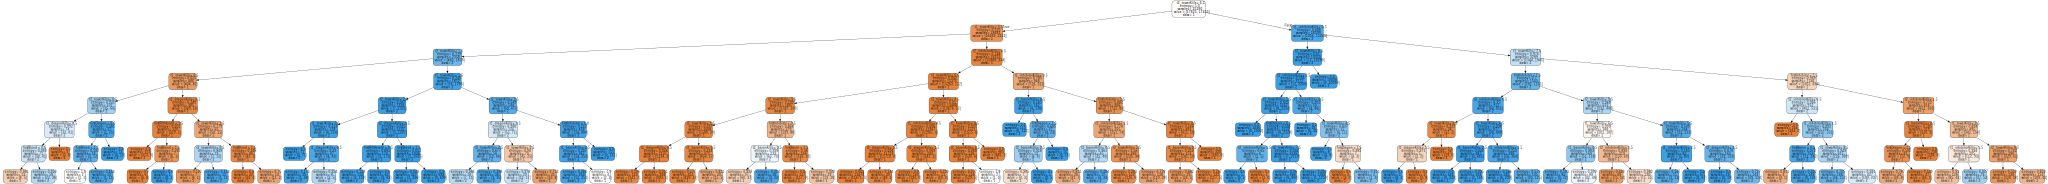

In [18]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(dt2, out_file=None, feature_names=x.columns,class_names=["1","2"], 
                     filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 